In [445]:
# import the libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer, Normalizer, FunctionTransformer, Binarizer, KernelCenterer
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [446]:
iris = load_iris()

In [447]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [448]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [449]:
df['length'] = df['petal length (cm)']
df['width'] = df['petal width (cm)']
df = df[['length', 'width']]
df['target'] = iris.target

<AxesSubplot: xlabel='length', ylabel='width'>

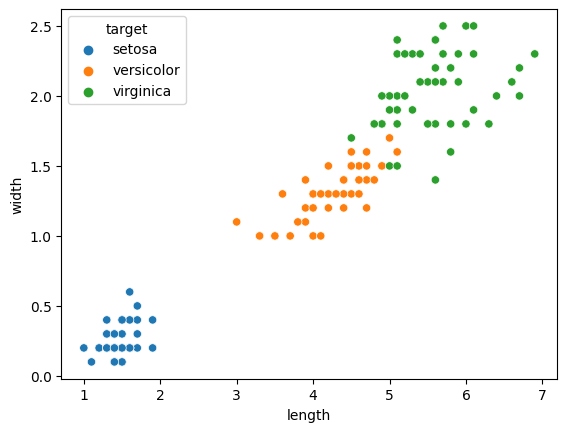

In [450]:
value_to_color = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['target'] = df['target'].map(value_to_color)
sns.scatterplot(df, x='length', y='width', hue='target')


In [451]:
scaler = QuantileTransformer()
scaler.fit(df[['length']])
df['length'] = scaler.transform(df[['length']])
scaler.fit(df[['width']])
df['width'] = scaler.transform(df[['width']])

c:\Users\Farhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Farhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(


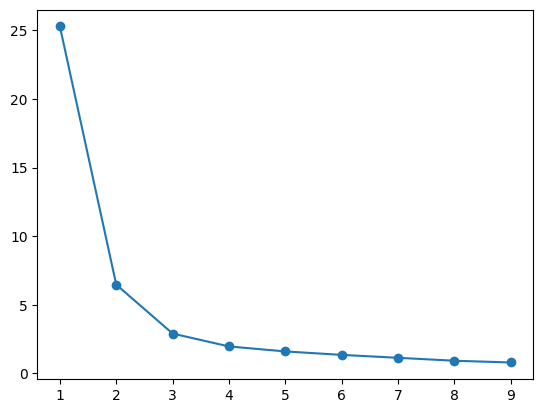

In [452]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df[['length', 'width']])
    sse.append(km.inertia_)
plt.plot(k_rng, sse)
plt.scatter(k_rng, sse)
plt.show()

In [453]:
# sns.scatterplot(df, x='length', y='width', hue='cluster')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


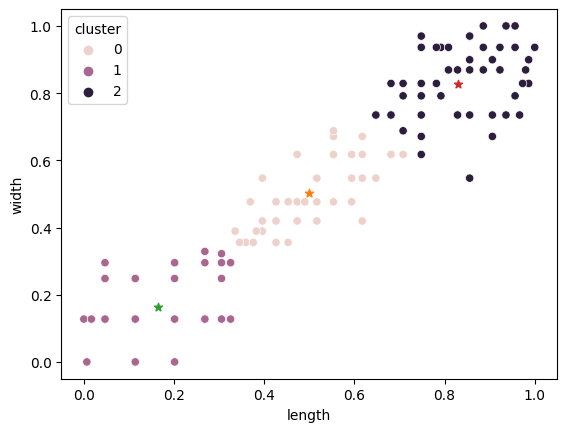

In [454]:
km = KMeans(n_clusters=3, n_init=10)
df['cluster'] = km.fit_predict(df[['length', 'width']])
sns.scatterplot(df, x='length', y='width', hue='cluster')
for i in km.cluster_centers_:
    plt.scatter(i[0], i[1], marker='*')
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

In [455]:
dir(iris)
df['target'] = iris.target
value_to_color = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

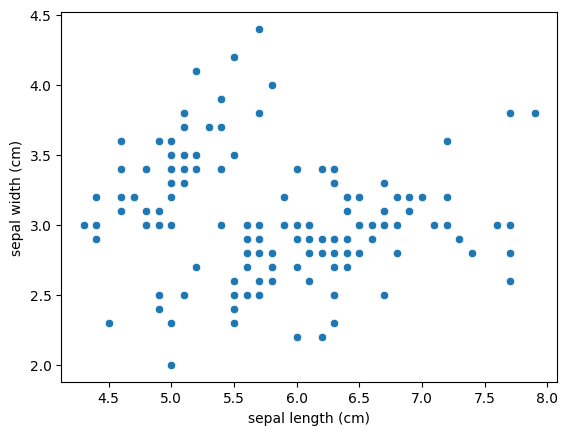

In [456]:
df['flower_name'] = df['target'].map(value_to_color)
sns.scatterplot(df, x='sepal length (cm)', y='sepal width (cm)')

In [457]:
value_to_color = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['target'] = df['target'].map(value_to_color)
sns.scatterplot(df, x='length', y='width', hue='target')


ValueError: Could not interpret value `length` for parameter `x`